In [1]:
import os
import sys
import glob

In [2]:
in_notebooks_dir = (
    (os.path.basename(os.getcwd()) == 'notebooks') and 
    (os.path.exists(os.path.join(os.path.dirname(os.getcwd()), 'src')))
)
if in_notebooks_dir:
    os.chdir(os.path.dirname(os.getcwd()))

srcdir = os.path.join('..', 'src')
if srcdir not in sys.path:
    sys.path.insert(0, srcdir)

Set out path for Low resolution / Recovered High Resolution / Ground Truth 

In [3]:
path_lr = f'data/processed/CGG_data/train/lr_crop_8x'
path_hr = f'models/LapSRN_31_03_2023_2022/inference_lr_crop_8x'
path_gt = f'data/processed/CGG_data/train/gt_crop'

In [6]:
import numpy as np
from src.utils.np_utils import load_image_as_np

for image_name in os.listdir(path_hr): #FIXME without a  for loop
    img_lr = load_image_as_np(os.path.join(path_lr, image_name))
    img_hr = load_image_as_np(os.path.join(path_hr, image_name))
    img_gt = load_image_as_np(os.path.join(path_gt, image_name))

In [7]:
print(np.shape(img_lr),np.shape(img_hr),np.shape(img_gt))

(128, 128, 3) (1024, 1024, 3) (1024, 1024, 3)


In [8]:
import matplotlib.pyplot as plt

Plot the histograms

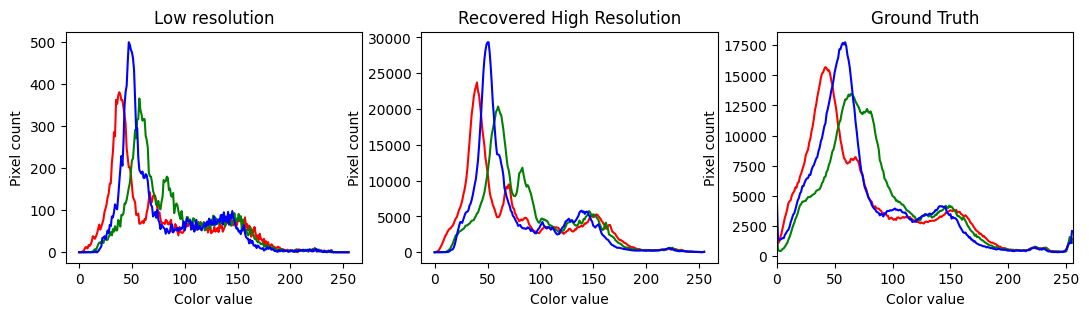

In [14]:
# tuple to select colors of each channel line
colors = ("red", "green", "blue")
# create the histogram plot, with three lines, one for
# each color
fig, axs = plt.subplots(1, 3, figsize=(13,3))


plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram_lr, bin_edges_lr = np.histogram(
        img_lr[:, :, channel_id], bins=256, range=(0, 256)
    
    )

    histogram_hr, bin_edges_hr = np.histogram(
        img_hr[:, :, channel_id], bins=256, range=(0, 256)
    
    )

    histogram_gt, bin_edges_gt = np.histogram(
        img_gt[:, :, channel_id], bins=256, range=(0, 256)
    
    )

    axs[0].plot(bin_edges_lr[0:-1], histogram_lr, color=color)
    axs[0].set_title('Low resolution')
    axs[1].plot(bin_edges_hr[0:-1], histogram_hr, color=color)
    axs[1].set_title('Recovered High Resolution')
    axs[2].plot(bin_edges_gt[0:-1], histogram_gt, color=color)
    axs[2].set_title('Ground Truth')

    for ax in axs.flat:
        ax.set(xlabel='Color value', ylabel='Pixel count')


Plot the images

Text(0.5, 1.0, 'Ground Truth')

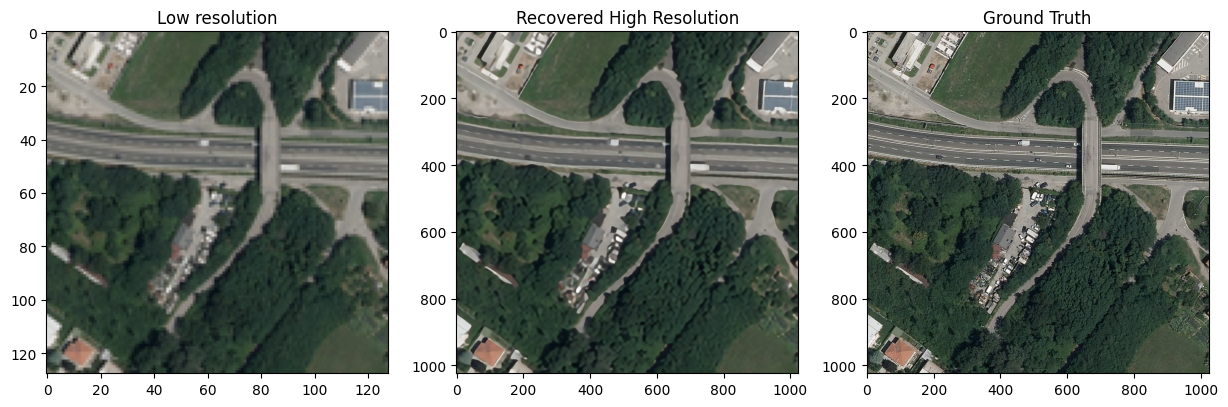

In [17]:

fig, axs = plt.subplots(1, 3, figsize=(15,15))
axs[0].imshow(img_lr)
axs[0].set_title('Low resolution')
axs[1].imshow(img_hr)
axs[1].set_title('Recovered High Resolution')
axs[2].imshow(img_gt)
axs[2].set_title('Ground Truth')